# Clustering using the `K-means` method to select groups of objects

In this task, we will consider the <code>K-means</code> clustering method to solve the clustering problem itself - the problem of selecting similar structures in data. We will work with the well-known <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a> dataset.

Let's load the dataset. We will use only the test part of the original set to reduce the training time of the models.

In [2]:
import numpy as np
import pandas as pd

In [3]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

/Users/lune/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


An example of outputting multiple objects and the corresponding class labels:

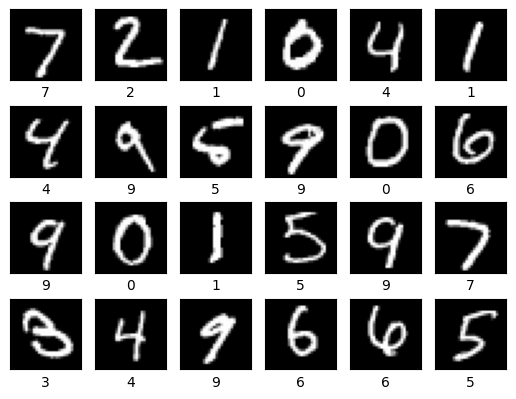

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Enter the <code>.shape</code> of the resulting dataset

In [28]:
# < ENTER YOUR CODE HERE > 
X.shape

(10000, 28, 28)

Split the dataset into training and test samples using <code>train_test_split</code> with parameters specified in your assignment.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# < ENTER YOUR CODE HERE > 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

Since we are talking about a known dataset, let's make <code>K-means</code> search for $10$ groups of objects. 

"Straighten" the images and train the algorithm <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> on the training dataset with the parameters specified in your assignment.

In [29]:
# < ENTER YOUR CODE HERE > 
#X_train = X_train.reshape((8000, 28*28))
#X_test = X_test.reshape((2000, 28*28))

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=29)
model.fit(X_train.reshape(-1, 28*28))

KMeans(n_clusters=10, random_state=29)

Determine the number of elements assigned to the cluster specified in your assignment.

In [ ]:
# < ENTER YOUR CODE HERE > 
y_train_model = model.predict(X_train.reshape(-1, 28*28))
len(y_train_model[y_train_model == 3])

In [11]:
kmeans = KMeans(n_clusters=10, random_state=29)
clusters = kmeans.fit_predict(X_train.reshape(-1, 784))

In [12]:
from collections import Counter
Counter(clusters)

Counter({2: 1056,
         3: 970,
         1: 932,
         0: 855,
         7: 805,
         6: 767,
         8: 705,
         4: 694,
         9: 631,
         5: 585})

Construct images corresponding to centroids of the obtained clusters. To do this, `reshape` coordinates of centroids to the size $28 \times 28$ and build the resulting matrix, for example, in black and white shades.

In [76]:
centroids_train = model.cluster_centers_.reshape(10, 28, 28)

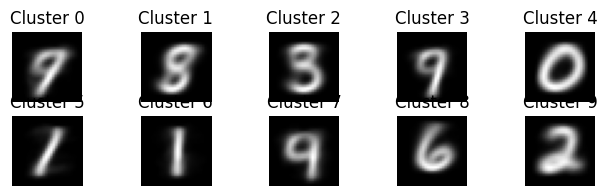

In [77]:
# < ENTER YOUR CODE HERE > 
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids_train[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

#plt.suptitle('Centroids of Clusters')
plt.show()

It can be seen that the resulting pictures look very similar to handwritten digits. However, the clustering was not without problems. Assume which digits may be mixed up and which digits are missing.

Since the resulting clusters know nothing about the nature of the objects being clustered, the labels of the clusters may differ from the "reasonable labels". Reconstruct the correct labels using the following considerations: a cluster is assigned the label of those digits whose representatives are the majority in the cluster. Did it really help to restore fairness?

Enter the obtained cluster labels after transformation via comma and space and compare with previously constructed images based on centroids. Are your assumptions confirmed by facts?

In [81]:
# < ENTER YOUR CODE HERE > 
from scipy.stats import mode
import numpy as np
y_train_model_corrected = np.zeros_like(y_train_model)
cluster_values_train = []
for i in range(10):
    mask = (y_train_model == i)
    y_train_model_corrected[mask] = mode(y_train[mask])[0]
    cluster_values_train.append(mode(y_train[mask])[0])

In [82]:
cluster_values_train

[7, 8, 3, 7, 0, 1, 1, 4, 6, 2]

It is reasonable to estimate something like accuracy. Assuming that all objects in the cluster have the same label as the cluster itself, compare these labels to the true labels. Calculate <code>accuracy</code> for the training dataset. We recommend using the function <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> from the <code>sklearn</code> library.

In [83]:
# < ENTER YOUR CODE HERE > 
from sklearn.metrics import accuracy_score
round(accuracy_score(y_train, y_train_model_corrected),3)

0.582

Use the <code>.predict()</code> method to cluster the test dataset. Rename the labels of the predicted clusters based on the transformation obtained for the training dataset.

In [94]:
# < ENTER YOUR CODE HERE > 
y_test_model = model.predict(X_test.reshape(-1,28*28))
y_test_model_corrected = np.zeros_like(y_test_model)
for i in range(10):
    mask = (y_test_model == i)
    y_test_model_corrected[mask] = cluster_values_train[i]

Construct the confusion matrix.

In [96]:
# < ENTER YOUR CODE HERE > 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_test_model_corrected)
mat

array([[169,   1,   1,  15,   0,   0,   6,   3,  10,   0],
       [  0, 215,   0,   1,   0,   0,   1,   0,   0,   0],
       [  1,  33, 144,  14,   2,   0,   4,   3,   4,   0],
       [  1,   9,   8, 143,   1,   0,   1,   5,  36,   0],
       [  0,   8,   0,   0,  90,   0,   2, 101,   0,   0],
       [  1,  14,   3,  48,   8,   0,   4,  31,  55,   0],
       [  6,  17,   3,   0,   1,   0, 155,   1,  14,   0],
       [  0,  19,   1,   0,  29,   0,   0, 162,   0,   0],
       [  3,  19,   2,  45,   5,   0,   1,  19, 117,   0],
       [  0,   6,   0,   3,  64,   0,   1, 111,   0,   0]])

With which digit did the trained model most often confuse the digit specified in your assignment?

In [100]:
# < ENTER YOUR CODE HERE > 
cluster_values_train_set = set([x for x in cluster_values_train]) 
cluster_values_full_set = set(range(10))
np.argmax(mat[list(cluster_values_full_set.difference(cluster_values_train_set))[0]])

Evaluate model on the test dataset.

In [109]:
# < ENTER YOUR CODE HERE > 
round(accuracy_score(y_test, y_test_model_corrected),3)

0.598

It is interesting to note that we built the classifier based on clustering while we did not use any "correct answers" (except for evaluation).

How many clusters seems to be the optimal number of clusters when using the Elbow method? Consider the number of clusters from $7$ to $16$. Can you confidently determine the optimal number of clusters?

In [ ]:
# < ENTER YOUR CODE HERE > 

All this training is too long. Let's make a "horseplay" and lower the dimensionality of the data, trying to keep distances between objects. Let's see how this affects speed and accuracy.

Transform the <b>training dataset</b> using the method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> from the <code>sklearn</code> library with the parameters specified in your assignment.

In [107]:
# < ENTER YOUR CODE HERE > 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=29)
X_train_tsne = tsne.fit_transform(X_train.reshape(-1, 28*28))


Cluster the resulting dataset using <code>KMeans</code> with the parameters specified in your assignment. Similar to what was done before, reassign cluster labels based on the labels of most objects within the cluster. Evaluate the accuracy of the model on the <b>training dataset</b>.

In [108]:
# < ENTER YOUR CODE HERE > 

model = KMeans(n_clusters=10, random_state=29)
model.fit(X_train_tsne)
y_train_model = model.predict(X_train_tsne)

y_train_model_corrected = np.zeros_like(y_train_model)
cluster_values_train = []
for i in range(10):
    mask = (y_train_model == i)
    y_train_model_corrected[mask] = mode(y_train[mask])[0]
    cluster_values_train.append(mode(y_train[mask])[0])
round(accuracy_score(y_train, y_train_model_corrected),3)

#y_test_model = model.predict(X_test.reshape(-1,28*28))
#y_test_model_corrected = np.zeros_like(y_test_model)
#for i in range(10):
#    mask = (y_test_model == i)
#    y_test_model_corrected[mask] = cluster_values_train[i]
#round(accuracy_score(y_test, y_test_model_corrected),3)

0.776

The problem, however, is known. `t-SNE` is a method that does not give a rule for obtaining projections of a multidimensional space onto, for example, a two-dimensional space. Thus, when new data appears, the projections will have to be searched again.

At the same time, once again, we would like to emphasize how unsupervised learning has allowed the construction of a classifier that seems to be the result of solving the problem of supervised learning.